# 1. 문제 정의

## 1) 배경

* 청원은 국민이 국가기관에 대해 일정한 사안에 관한 자신의 의견이나 희망을 진술하는 것을 말한다. 우리 헌법 제26조는 국민의 청원할 권리와 국가의 청원에 대한 심사의 의무를 규정하고 있다. 이를 위해 국민은 국민동의청원 홈페이지를 통해 30일 동안 5만 명의 국민의 동의를 받아 제출할 수 있다[1].

* 청원은 인권/성평등, 문화/예술/체육/언론, 육아/교육 등의 주제로 나뉜다. 청원의 내용에 따라 청원의 주제/범주를 분류할 수 있다면 이를 바탕으로 유사한 청원을 분류하는 등 다른 서비스를 제작하는 데 활용할 수 있을 것이다.

## 2) 문제 정의

* 청원 내용에 따른 청원의 주제/범주를 예측해 봅시다.

### 참조

[1] 국민동의청원 홈페이지, https://petitions.assembly.go.kr/about/intro

# 2. 데이터 수집 및 전처리

* 데이터 수집 : [데이콘](https://dacon.io/competitions/open/235597/data)

* 데이터 세트 설명 : 청와대 청원 주제 데이터

* 컬럼 설명

  * index: index
  * category: 청원 주제/범주
  * data: 청원 내용

* 라벨 종류

  * 0: 인권/성평등
  * 1: 문화/예술/체육/언론
  * 2: 육아/교육

In [1]:
!pip install wordcloud konlpy
!apt-get install fonts-nanum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 55.6 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,199 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 155676 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacki

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# 데이터 가져오기
import numpy as np
import pandas as pd

train_df = pd.read_csv('train.csv', index_col='index')
test_df = pd.read_csv('test.csv', index_col='index')
# train_df = pd.read_csv('/content/drive/MyDrive/blue_house_petition/train.csv', index_col='index')
# test_df = pd.read_csv('/content/drive/MyDrive/blue_house_petition/test.csv', index_col='index')

train_df.shape, test_df.shape

((40000, 2), (5000, 1))

In [6]:
# 데이터 확인하기
train_df.head()

,category,data
index,,
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


In [7]:
# 열 정보 보기
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  40000 non-null  int64 
 1   data      39992 non-null  object
dtypes: int64(1), object(1)
memory usage: 937.5+ KB


In [8]:
test_df.head()

,data
index,
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 11년간 일하고 혈암과 백혈병 진단을 받은 ...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부..."


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   data    5000 non-null   object
dtypes: object(1)
memory usage: 78.1+ KB


In [10]:
train_df.isna().sum()

category    0
data        8
dtype: int64

In [11]:
# 결측치가 있는 데이터 제거하기
train_df.dropna(inplace=True)
train_df.reset_index(drop=True)

,category,data
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...
...,...,...
39987,2,시간유연근무제. 저는 국립대에서 일하고 있는 비정규직 근로자입니다.\n동시에 두 ...
39988,0,소년법을 폐지해 주시고 부산 여중생 가해자 학생들의 강력한 처벌을 요구합니다. 소년...
39989,2,무서운데 지켜야 할게 있어요 도와주세요. 안녕하세요 . 한부모엄마 입니다.\n양육비...
39990,2,교복에 고정식 이름표를 달게 하는 것을 금지해 주세요.. 교복에 이름표를 박아놓아...


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39992 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  39992 non-null  int64 
 1   data      39992 non-null  object
dtypes: int64(1), object(1)
memory usage: 937.3+ KB


# 3. 데이터 분석

* 청원 주제/범주별 데이터 개수 알아보기
* 청원 주제/범주별 주요 단어 알아보기

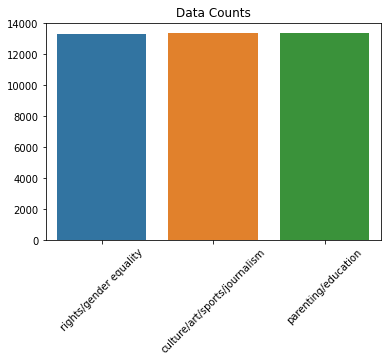

In [13]:
category = [
    '인권/성평등',
    '문화/예술/체육/언론',
    '육아/교육'
]
category_en = [
    'rights/gender equality',
    'culture/art/sports/journalism',
    'parenting/education'
]

df0 = train_df[train_df['category'] == 0]
df1 = train_df[train_df['category'] == 1]
df2 = train_df[train_df['category'] == 2]

import matplotlib.pyplot as plt
import seaborn as sns

plt.title('Data Counts')
sns.barplot(x=category_en, y=[len(df0), len(df1), len(df2)])
plt.xticks(rotation=45)
plt.show()

데이터 개수가 주제/범주별로 약 13000개 정도로 균일함

In [14]:
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter


okt = Okt()

In [15]:
stopwords = ['이', '그', '저', '이런', '저런', '그런',
             '일', '입니다', '있는', '있을', '있습니다', '없는', '없을', '없습니다', '아니라',
             '등', '수', '것', '때', '같은', '경우', '중', '및',
             '위', '왜', '더',
             '또한', '위해', '대해', '때문',
             '제', '자신', '우리',
             '말', '생각', '시간', '사실', '지금', '현재',
             '많은', '어떤', '모든',
             '정말',
             '요']
noun_adj_list = []

In [16]:
def df2text(df: pd.DataFrame) -> str:
  text = ''
  for i in range(len(df)):
    text += (df.iloc[i]['data'] + '\n')
  return text

category_text = [
    df2text(df0.iloc[0:500]),
    df2text(df1.iloc[0:500]),
    df2text(df2.iloc[0:500])
]

sentences_tags = [okt.pos(t) for t in category_text]

In [17]:
noun_adj_lists = []
for i in range(3):
  noun_adj_list = []
  for word, tag in sentences_tags[i]:
      if tag in ['Noun' , 'Adjective'] and word not in stopwords:
          noun_adj_list.append(word)
  noun_adj_lists.append(noun_adj_list)


# 가장 많이 나온 단어부터 50개를 저장한다.
counts = [Counter(nal) for nal in noun_adj_lists]
tags_list = [c.most_common(50) for c in counts]

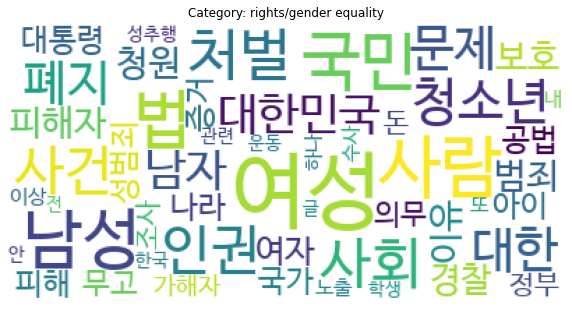

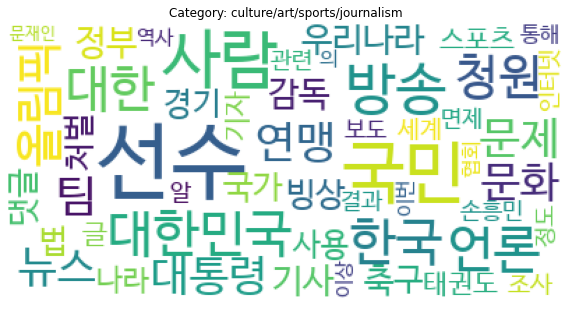

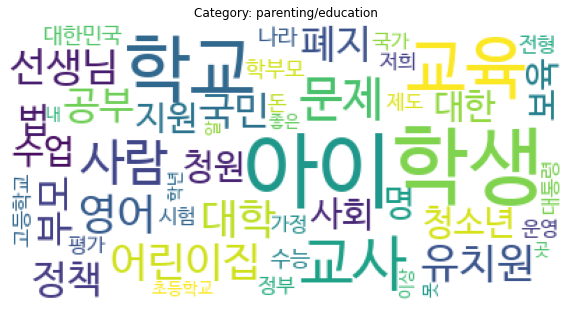

In [18]:
for i in range(3):
  tags = tags_list[i]
  wc = WordCloud(font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',background_color="white", max_font_size=60)
  cloud = wc.generate_from_frequencies(dict(tags))

  plt.figure(figsize=(10, 8))
  plt.title(f'Category: {category_en[i]}')
  plt.axis('off')
  plt.imshow(cloud)
  plt.show()

주제/범주별로 단어 빈도수에 차이가 있음
  * 인권/성평등: 인권, 남성, 여성, 사회, 청소년, 피해자
  * 문화/예술/체육/언론: 감독, 방송, 축구, 언론, 협회, 선수, 올림픽
  * 육아/교육: 선생님, 교육, 교사, 유치원, 아이, 부모, 학생, 학교, 수능 어린이집

# 4. 모델 학습

* 딥러닝 모델을 사용하여 청원 주제/범주 예측하기

In [19]:
from tensorflow import keras

In [20]:
train_data = train_df['data'].tolist()
train_target = train_df['category'].tolist()
test_data = test_df['data'].tolist()
train_data[0]

'신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지 마시고\\n보편적으로 모든국민이 수긍할  수 있는 복지정책 펴 주시길 바랍니다.\\n저도 신혼부부이지만 당첨되는 사람 로또되는 이런주택정책 반대합니다.\\n국민세금을 일부 사람들에게 퍼주기식이 되면 안되죠..\\n그 세금으로 우리아이 안전하게 맡길 수 있는 보육시설을 전국에 설치해 주세요..\\n대기업들은 솔선수범해서 모든 사업장에 의무설치 할 수 있도록 하시구요..\\n집 보다 애 맡길데가 없어 경력단절 되는게 더 괴롭습니다.!\\n집은 개인의 능력을 키워 사는게 맞습니다.\\n그 능력을 키울수 있도록 육아 전담에 힘을 기울이는게 맞습니다.\\n우리아이 부모가 키우는거 맞지만 이제는 국가가\\n책임지는 시대로 가는게 맞다고 봅니다.\\n그렇잖아도 부동산 가격 자꾸 올라가는게 정부정책이 잘못 되었다고 봅니다.\\n부동산은 그냥 내버려 두세요!  좀!\\n건들수록 역효과네요..'

In [21]:
# 텍스트 전처리
def clean_text(text: str) -> str:
  for punkt in ['.', ',', '?', '!', ':', ';', "'", '"', '(', ')', '{', '}', '[', ']', '-', '_', '+', '=', '`', '~', '\n', '\\n', '@']:
    text = text.replace(punkt, '')
  return text

train_data = [clean_text(t) for t in train_data]
test_data = [clean_text(t) for t in test_data]
train_data[0]

'신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지 마시고보편적으로 모든국민이 수긍할  수 있는 복지정책 펴 주시길 바랍니다저도 신혼부부이지만 당첨되는 사람 로또되는 이런주택정책 반대합니다국민세금을 일부 사람들에게 퍼주기식이 되면 안되죠그 세금으로 우리아이 안전하게 맡길 수 있는 보육시설을 전국에 설치해 주세요대기업들은 솔선수범해서 모든 사업장에 의무설치 할 수 있도록 하시구요집 보다 애 맡길데가 없어 경력단절 되는게 더 괴롭습니다집은 개인의 능력을 키워 사는게 맞습니다그 능력을 키울수 있도록 육아 전담에 힘을 기울이는게 맞습니다우리아이 부모가 키우는거 맞지만 이제는 국가가책임지는 시대로 가는게 맞다고 봅니다그렇잖아도 부동산 가격 자꾸 올라가는게 정부정책이 잘못 되었다고 봅니다부동산은 그냥 내버려 두세요  좀건들수록 역효과네요'

In [22]:
vocab = set()
for text in train_data:
  for syllable in text:
    vocab.add(syllable)
vocab_size = len(vocab)+2
vocab_size

4070

In [23]:
word2idx = {word:(i+2) for (i, word) in enumerate(vocab)}
word2idx['@'] = 0  # 패딩 토큰
word2idx['?'] = 1  # 모르는 토큰
print(word2idx)

{'얕': 2, 'ㅗ': 3, '례': 4, '踐': 5, '輪': 6, 'ㅢ': 7, '\uf082': 8, '豊': 9, '択': 10, '끓': 11, '굽': 12, '吾': 13, '템': 14, '·': 15, '風': 16, '쥤': 17, '츤': 18, '튿': 19, '란': 20, '砲': 21, '캪': 22, '혓': 23, '敵': 24, '솜': 25, '윗': 26, '位': 27, '脣': 28, '묶': 29, '\u3000': 30, '척': 31, 'ざ': 32, 'ث': 33, '꺼': 34, '及': 35, '♀': 36, '놔': 37, '光': 38, '또': 39, '盡': 40, '☜': 41, '鉉': 42, '타': 43, '軋': 44, '탁': 45, '폈': 46, 'ㅍ': 47, '뉨': 48, '쉰': 49, '行': 50, '堰': 51, '쏟': 52, '설': 53, '앋': 54, '웁': 55, '벙': 56, '覇': 57, '彷': 58, '먗': 59, '똉': 60, 'ح': 61, '쨀': 62, '덴': 63, '聯': 64, '믈': 65, '긕': 66, '人': 67, 'ᄀ': 68, '🕹': 69, '댔': 70, '꽃': 71, '릇': 72, '💜': 73, '브': 74, '밝': 75, '津': 76, '勇': 77, '독': 78, '톱': 79, '뾰': 80, '患': 81, '헐': 82, '좨': 83, '씃': 84, '弘': 85, '몱': 86, '쉬': 87, '♣': 88, '넷': 89, '키': 90, '숟': 91, '分': 92, 'C': 93, '좁': 94, '햝': 95, '햬': 96, '앍': 97, '훝': 98, '幼': 99, '😭': 100, '록': 101, '메': 102, '廢': 103, '⓵': 104, '겔': 105, '깐': 106, '實': 107, '맘': 108, '－': 109, 'ⅴ': 110, '군': 

In [24]:
idx2word = []
for (i, word) in enumerate(word2idx):
  idx2word.append(word)
print(idx2word)

['얕', 'ㅗ', '례', '踐', '輪', 'ㅢ', '\uf082', '豊', '択', '끓', '굽', '吾', '템', '·', '風', '쥤', '츤', '튿', '란', '砲', '캪', '혓', '敵', '솜', '윗', '位', '脣', '묶', '\u3000', '척', 'ざ', 'ث', '꺼', '及', '♀', '놔', '光', '또', '盡', '☜', '鉉', '타', '軋', '탁', '폈', 'ㅍ', '뉨', '쉰', '行', '堰', '쏟', '설', '앋', '웁', '벙', '覇', '彷', '먗', '똉', 'ح', '쨀', '덴', '聯', '믈', '긕', '人', 'ᄀ', '🕹', '댔', '꽃', '릇', '💜', '브', '밝', '津', '勇', '독', '톱', '뾰', '患', '헐', '좨', '씃', '弘', '몱', '쉬', '♣', '넷', '키', '숟', '分', 'C', '좁', '햝', '햬', '앍', '훝', '幼', '😭', '록', '메', '廢', '⓵', '겔', '깐', '實', '맘', '－', 'ⅴ', '군', '빼', 'ュ', '뭇', '즁', '去', 'ㄹ', '죄', '얍', '罪', '澄', '팟', '⑯', '갔', '¡', '췄', 'な', '캘', '섀', '素', '👎', '誰', '됐', '넴', '錢', '극', '뚝', '촛', '龍', 'ى', '찡', '햡', '앳', '랑', '랆', '育', '것', '起', '重', '웟', '긻', '針', '⏨', '驛', '性', '맥', '랬', '호', '릊', '괸', '젊', '\uf258', '路', '\uebe1', '‥', '꼐', '頭', '特', '）', '꾼', '흰', '눕', '点', '接', '旺', 'ة', '뽀', '멕', '］', '써', '끚', '崔', '렇', '랗', '얐', '右', '힙', '몀', 'ㅐ', '킝', '離', '삯', '튈', '推', '쫌', '³', '착',

In [25]:
# 음절별 토큰화
def syllable_tokenizer(text: str) -> list:
  return [c for c in text.replace(' ', '')]

print(syllable_tokenizer(train_data[0])[:50])

['신', '혼', '부', '부', '위', '한', '주', '택', '정', '책', '보', '다', '보', '육', '시', '설', '늘', '려', '주', '세', '요', '국', '민', '세', '금', '으', '로', '일', '부', '를', '위', '한', '정', '책', '펴', '지', '마', '시', '고', '보', '편', '적', '으', '로', '모', '든', '국', '민', '이', '수']


In [26]:
train_data = [syllable_tokenizer(t) for t in train_data]
test_data = [syllable_tokenizer(t) for t in test_data]

In [27]:
train_data = [[word2idx[c] for c in t] for t in train_data]
temp = []
for t in test_data:
  res = []
  for c in t:
    idx = word2idx.get(c)
    if idx is None:
      res.append(1)  # 모르는 토큰
    else:
      res.append(idx)
  temp.append(res)
test_data = temp

print(train_data[0])

[1398, 2718, 386, 386, 1706, 3734, 3036, 2622, 1485, 852, 3860, 382, 3860, 1534, 3356, 53, 1284, 1465, 3036, 2031, 2592, 198, 1788, 2031, 3300, 715, 294, 3265, 386, 1614, 1706, 3734, 1485, 852, 3654, 1536, 1742, 3356, 1921, 3860, 2579, 1905, 715, 294, 3324, 1662, 198, 1788, 2877, 697, 3969, 2719, 697, 1083, 2474, 1496, 1536, 1485, 852, 3654, 3036, 3356, 2711, 1553, 3029, 1949, 382, 1456, 2084, 1398, 2718, 386, 386, 2877, 1536, 1219, 2507, 2508, 2258, 2474, 1078, 1657, 294, 39, 2258, 2474, 2877, 3155, 3036, 2622, 1485, 852, 1955, 2139, 2926, 1949, 382, 198, 1788, 2031, 3300, 2035, 3265, 386, 1078, 1657, 3252, 3319, 2745, 1554, 3036, 1644, 1670, 2877, 2258, 749, 2278, 2258, 3630, 850, 2031, 3300, 715, 294, 3932, 2887, 345, 2877, 2278, 2459, 488, 2745, 2734, 2711, 697, 1083, 2474, 3860, 1534, 3356, 53, 2035, 2459, 198, 3319, 53, 1860, 2321, 3036, 2031, 2592, 2139, 1644, 3059, 3252, 1209, 3055, 1959, 697, 2628, 2321, 2174, 3324, 1662, 1078, 3059, 2410, 3319, 406, 3037, 53, 1860, 2719, 697,

In [28]:
# 텍스트 데이터를 어휘 번호 리스트로 변환하기(토큰화)
max_len = 256

train_data = keras.preprocessing.sequence.pad_sequences(
    train_data,
    value=word2idx['@'],
    padding='post',
    maxlen=max_len
)
test_data = keras.preprocessing.sequence.pad_sequences(
    test_data,
    value=word2idx['@'],
    padding='post',
    maxlen=max_len
)
train_data[:10]

array([[1078, 1657,  294, ..., 4018,  637, 2592],
       [1356,  349, 3340, ..., 2926, 1949,  382],
       [4028, 3336, 2410, ..., 2926, 1949,  382],
       ...,
       [ 697, 3356, 1827, ...,    0,    0,    0],
       [3955,  975,  386, ...,    0,    0,    0],
       [3036, 2507,  386, ..., 3029, 1949,  382]], dtype=int32)

In [31]:
import numpy as np
train_target = np.array(train_target)

In [32]:
# 데이터 나누기
from sklearn.model_selection import train_test_split

train_data, val_data, train_target, val_target = train_test_split(train_data, train_target, test_size=0.2, random_state=0)

In [33]:
print(train_data.shape, train_target.shape)    # (31993, 256) (31993,)
print(val_data.shape, val_target.shape)        # (7999, 256) (7999,)

(25594, 256) (25594,)
(6399, 256) (6399,)


In [34]:
# 인공신경망 모델 생성하기
from keras import models, layers

num_classes = len(category)  # 3

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          65120     
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 3)                 51        
                                                                 
Total params: 65,443
Trainable params: 65,443
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(loss='sparse_categorical_crossentropy',  # 손실함수
              optimizer='adam',                        # 옵티마이저
              metrics=['accuracy'])                    # Accuracy : 정확도

In [36]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(train_data, train_target, epochs=1000, 
                    validation_data=(val_data, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/1000
800/800 [==============================] - 5s 5ms/step - loss: 0.8222 - accuracy: 0.6474 - val_loss: 0.5858 - val_accuracy: 0.7732
Epoch 2/1000
800/800 [==============================] - 4s 5ms/step - loss: 0.5251 - accuracy: 0.8000 - val_loss: 0.5113 - val_accuracy: 0.7981
Epoch 3/1000
800/800 [==============================] - 4s 5ms/step - loss: 0.4811 - accuracy: 0.8168 - val_loss: 0.4965 - val_accuracy: 0.8054
Epoch 4/1000
800/800 [==============================] - 4s 5ms/step - loss: 0.4616 - accuracy: 0.8230 - val_loss: 0.4975 - val_accuracy: 0.8004
Epoch 5/1000
800/800 [==============================] - 4s 5ms/step - loss: 0.4503 - accuracy: 0.8271 - val_loss: 0.4972 - val_accuracy: 0.8033
Epoch 6/1000
800/800 [==============================] - 4s 5ms/step - loss: 0.4417 - accuracy: 0.8314 - val_loss: 0.4900 - val_accuracy: 0.8058
Epoch 7/1000
800/800 [==============================] - 4s 5ms/step - loss: 0.4348 - accuracy: 0.8319 - val_loss: 0.4934 - val_accuracy:

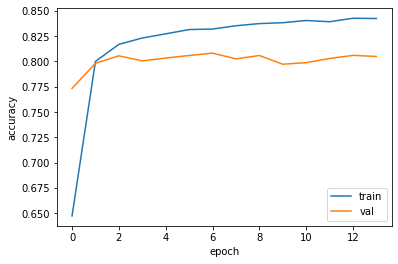

In [37]:
def make_plot():
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.xlabel('epoch')
  plt.ylabel('accuracy')
  plt.legend(['train', 'val'])
  plt.show()

make_plot()

# 5. 모델 평가

In [38]:
# 모델 평가하기
model.evaluate(val_data, val_target)

200/200 [==============================] - 1s 3ms/step - loss: 0.4865 - accuracy: 0.8058


[0.48648932576179504, 0.8057509064674377]

In [39]:
# 테스트값 정규화하기
print(test_df.iloc[0])
print(test_data[0])

data    소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...
Name: 0, dtype: object
[3379 2160 1305 2884 1536 2321 3036 2031 2592 1305  345 1329 3319 2174
 3860  158 2613  345 3722 2719  345 2877 3252 2877 1305  715  294 4030
 2321 3860  158 2613 1536  730  488 1921 1083 4052 1949  382 3544 1161
 1465 1305 2035 3475 1781  488 2474 1078    4 1219 1284 2815 1168 1921
  850 3989 2084 2474 3707  345 1536 1921 1083 4052 1949  382 3379 2160
 1305 2884 1536 1614  386   45 3823  809 1949  382    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0  

In [40]:
# 모델 예측하기
import numpy as np
result = np.argmax(model(np.array([test_data[0]]))[0])
print('Pred:', result)
print('Category:', category[result])

Pred: 2
Category: 육아/교육


In [41]:
# 모델 저장하기
model.save('my_model.h5')

In [42]:
# Scaler 저장하기
from pickle import dump 

dump(word2idx, open('word2idx.pkl', 'wb'))

In [43]:
from google.colab import files
files.download("my_model.h5")
files.download("word2idx.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 6. 배포

* Flask를 사용하여 웹으로 배포하기